In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.neighbors import LocalOutlierFactor


In [2]:
os_loc = os.getcwd()

In [3]:
bike_train = pd.read_csv(os_loc + '/bike_data/train.csv', encoding = 'cp949')

In [4]:
farm = pd.read_csv(os_loc + '/농산물데이터/public_data/train.csv')

In [5]:
bike_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
bike_train.shape

(10886, 12)

In [7]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
farm.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


In [9]:
farm.columns

Index(['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [10]:
farm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1733 non-null   object 
 1   요일              1733 non-null   object 
 2   배추_거래량(kg)      1733 non-null   float64
 3   배추_가격(원/kg)     1733 non-null   float64
 4   무_거래량(kg)       1733 non-null   float64
 5   무_가격(원/kg)      1733 non-null   float64
 6   양파_거래량(kg)      1733 non-null   float64
 7   양파_가격(원/kg)     1733 non-null   float64
 8   건고추_거래량(kg)     1733 non-null   float64
 9   건고추_가격(원/kg)    1733 non-null   float64
 10  마늘_거래량(kg)      1733 non-null   float64
 11  마늘_가격(원/kg)     1733 non-null   float64
 12  대파_거래량(kg)      1733 non-null   float64
 13  대파_가격(원/kg)     1733 non-null   float64
 14  얼갈이배추_거래량(kg)   1733 non-null   float64
 15  얼갈이배추_가격(원/kg)  1733 non-null   float64
 16  양배추_거래량(kg)     1733 non-null   float64
 17  양배추_가격(원/kg)    1733 non-null   f

In [11]:
bike_category = bike_train.columns[1:5]

In [12]:
bike_train[bike_category]

,season,holiday,workingday,weather
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1
...,...,...,...,...
10881,4,0,1,1
10882,4,0,1,1
10883,4,0,1,1
10884,4,0,1,1


In [13]:
for i in bike_category:
    print(bike_train[i].unique(), end = "\n")

[1 2 3 4]
[0 1]
[0 1]
[1 2 3 4]


In [14]:
x_train_df = bike_train.drop(['count'], axis = 1)
y_train = bike_train['count'].to_numpy()

In [15]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['season', 'holiday', 'workingday', 'weather']),
    remainder = 'passthrough')

#remainder : 'drop' 과 'passthrough' 두개의 값이 존재한다. 'drop'은 선택된 컬럼 이외 값들은 제외하고 선정된 컬럼에 한하여 전처리를 실시하고 반환한다. 'passthrough'는 선택된 컬럼 이외에 모든 값들을 포함하여 값을 반환한다.
#n_jobs : 사용할 cpu코어의 개수를 설정할 수 있다.
#sparse_threshold : 희소 데이터와 밀도 데이터가 혼합된 경우 밀도를 리턴할때 이 값을 0으로 설정해준다. default는 0.3 (무슨소리인지는 잘 이해가 안된다.)
#주로 쓰는것은 어떤 전처리 방식을 사용할지와 전처리할 컬럼 그리고 raminder 파라미터인 것 같다.

transformer.fit(x_train_df)
x_train = transformer.transform(x_train_df)

In [16]:
print(x_train[0])

[1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 '2011-01-01 00:00:00'
 9.84 14.395 81 0.0 3 13]


In [17]:
print(x_train[0][0:4]) # season 컬럼 원핫 인코딩

[1.0 0.0 0.0 0.0]


In [18]:
print(x_train[0][4:6]) # holiday 컬럼 원핫 인코딩

[1.0 0.0]


In [19]:
print(x_train[0][6:8]) # workingday 컬럼 원핫 인코딩

[1.0 0.0]


In [20]:
print(x_train[0][8:12]) # weather 컬럼 원핫 인코딩

[1.0 0.0 0.0 0.0]


## 문자열 Encoding : Labelencoder, OneHotEncoding, get_dummies, replace

### LabelEncoder

In [21]:
farm_Label = LabelEncoder().fit_transform(farm['요일']) 
farm_Label[:10]

array([0, 5, 4, 3, 6, 2, 1, 0, 5, 4])

In [22]:
farm['요일'].value_counts() # 금 : 0, 토 : 5, 일 : 4, 월 : 3, 화 : 6, 수 : 2, 목 : 1

토요일    248
일요일    248
금요일    248
월요일    248
수요일    247
화요일    247
목요일    247
Name: 요일, dtype: int64

In [23]:
pd.Series(farm_Label).value_counts()

5    248
4    248
3    248
0    248
6    247
2    247
1    247
dtype: int64

### OneHotEncoder

In [24]:
onehot = OneHotEncoder()
farm_OneHot = onehot.fit_transform(farm['요일'].values.reshape(-1,1))

In [25]:
farm_OneHot.toarray()[0:3]

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.]])

In [26]:
onehot.categories_

[array(['금요일', '목요일', '수요일', '월요일', '일요일', '토요일', '화요일'], dtype=object)]

### pd.dummies

In [27]:
pd.get_dummies(farm['요일'])

,금요일,목요일,수요일,월요일,일요일,토요일,화요일
0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1728,0,1,0,0,0,0,0
1729,1,0,0,0,0,0,0
1730,0,0,0,0,0,1,0
1731,0,0,0,0,1,0,0


In [28]:
pd.get_dummies(farm) # 데이터프레임 전체에서 데이터 타입이 object인 요소들을 전부다 원핫 인코딩으로 변환 후 컬럼 추가

,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),...,date_2020-09-26,date_2020-09-27,date_2020-09-28,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,5475.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,5210.0,...,0,0,0,0,0,0,1,0,0,0
4,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,5387.0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,134359.9,4775.0,...,0,0,0,0,1,0,0,0,0,0
1729,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,126926.0,5039.0,...,0,0,0,1,0,0,0,0,0,0
1730,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,110357.7,5565.0,...,1,0,0,0,0,0,0,0,1,0
1731,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,620.0,5227.0,...,0,1,0,0,0,0,0,1,0,0


In [29]:
pd.get_dummies(farm, columns = ['요일']) # 원하는 컬럼만 설정 가능

,date,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),...,캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg),요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일
0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,0,0,0,0
1,2016-01-02,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,15019.0,...,2014.0,0.0,0.0,0,0,0,0,0,1,0
2,2016-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,0,0,0,1,0,0
3,2016-01-04,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,141638.0,...,3885.0,0.0,0.0,0,0,0,1,0,0,0
4,2016-01-05,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,126207.8,...,2853.0,0.0,0.0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,2020-09-24,1856965.0,1839.0,2055640.0,990.0,2281429.2,990.0,2818.4,19101.0,134359.9,...,3620.0,283196.9,10940.0,0,1,0,0,0,0,0
1729,2020-09-25,1880095.5,1789.0,1879261.0,1011.0,2074513.0,955.0,1887.1,23095.0,126926.0,...,3618.0,303779.6,10844.0,1,0,0,0,0,0,0
1730,2020-09-26,1661090.9,1760.0,1709385.7,1075.0,2089081.2,961.0,959.0,22510.0,110357.7,...,3691.0,313295.7,10636.0,0,0,0,0,0,1,0
1731,2020-09-27,25396.0,3066.0,38222.0,1139.0,18240.0,1056.0,60.0,22333.0,620.0,...,3567.0,9734.0,10699.0,0,0,0,0,1,0,0


### replace : 원하는 형태로 라벨링을 직접 할 수 있다.

In [30]:
farm['요일'].replace(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'], [0,1,2,3,4,5,6])[:7]

0    4
1    5
2    6
3    0
4    1
5    2
6    3
Name: 요일, dtype: int64

In [31]:
farm['요일'][:7]

0    금요일
1    토요일
2    일요일
3    월요일
4    화요일
5    수요일
6    목요일
Name: 요일, dtype: object

## 특성 스케일링

### Scaling

### 정규화(Normalization) : 데이터를 0~1사이의 값으로 범주를 바꾸는 작업이다.

In [32]:
bike_mes= bike_train.iloc[:,5:12]

In [33]:
bike_mes.head()

,temp,atemp,humidity,windspeed,casual,registered,count
0,9.84,14.395,81,0.0,3,13,16
1,9.02,13.635,80,0.0,8,32,40
2,9.02,13.635,80,0.0,5,27,32
3,9.84,14.395,75,0.0,3,10,13
4,9.84,14.395,75,0.0,0,1,1


In [34]:
bike_nor = (bike_mes - np.mean(bike_mes)) / (np.max(bike_mes) - np.min(bike_mes))

In [35]:
bike_nor

,temp,atemp,humidity,windspeed,casual,registered,count
0,-0.258608,-0.207184,0.191135,-0.224563,-0.089978,-0.160894,-0.179892
1,-0.279016,-0.224188,0.181135,-0.224563,-0.076354,-0.139449,-0.155301
2,-0.279016,-0.224188,0.181135,-0.224563,-0.084528,-0.145093,-0.163498
3,-0.258608,-0.207184,0.131135,-0.224563,-0.089978,-0.164280,-0.182965
4,-0.258608,-0.207184,0.131135,-0.224563,-0.098152,-0.174438,-0.195260
...,...,...,...,...,...,...,...
10881,-0.115751,-0.088602,-0.118865,0.231650,-0.079079,0.195765,0.147977
10882,-0.136159,-0.139391,-0.048865,0.038632,-0.070905,0.085156,0.050641
10883,-0.156567,-0.173287,-0.008865,0.038632,-0.087253,0.009535,-0.024154
10884,-0.156567,-0.139391,-0.008865,-0.119238,-0.065455,-0.043513,-0.064113


In [36]:
bike_nor = preprocessing.Normalizer().fit_transform(bike_mes)

In [37]:
bike_nor

array([[0.11517605, 0.16849179, 0.94809553, ..., 0.03511465, 0.15216348,
        0.18727813],
       [0.09325632, 0.14097006, 0.82710708, ..., 0.08271071, 0.33084283,
        0.41355354],
       [0.09815212, 0.14837075, 0.87052876, ..., 0.05440805, 0.29380346,
        0.3482115 ],
       ...,
       [0.05713427, 0.06520848, 0.25001367, ..., 0.01639434, 0.67216789,
        0.68856223],
       [0.0748026 , 0.09350325, 0.32732844, ..., 0.06439248, 0.62782668,
        0.69221916],
       [0.09346943, 0.1187247 , 0.47019685, ..., 0.02849678, 0.59843235,
        0.62692913]])

### 표준화(Standardization) : 평균이 0, 표준편차가 1인 표준정규분포로 표준화를 시킨다. 그리고 표준화된 값은 Z-Score라고 한다.

In [38]:
bike_standadized = (bike_mes-np.mean(bike_mes,axis = 0)) / np.std(bike_mes, axis = 0)

In [39]:
bike_standadized

,temp,atemp,humidity,windspeed,casual,registered,count
0,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,-0.969294
1,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,-0.836797
2,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158,-0.880962
3,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717,-0.985856
4,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307,-1.052104
...,...,...,...,...,...,...,...
10881,-0.596935,-0.467310,-0.617666,1.617227,-0.580925,1.148417,0.797333
10882,-0.702182,-0.735182,-0.253919,0.269704,-0.520875,0.499548,0.272866
10883,-0.807428,-0.913959,-0.046064,0.269704,-0.640975,0.055934,-0.130146
10884,-0.807428,-0.735182,-0.046064,-0.832442,-0.480841,-0.255258,-0.345454


In [40]:
np.mean(bike_mes,axis = 0)

temp           20.230860
atemp          23.655084
humidity       61.886460
windspeed      12.799395
casual         36.021955
registered    155.552177
count         191.574132
dtype: float64

In [41]:
np.std(bike_mes, axis = 0)

temp            7.791232
atemp           8.474211
humidity       19.244149
windspeed       8.164162
casual         49.958182
registered    151.032096
count         181.136134
dtype: float64

In [42]:
import scipy.stats as ss

bike_standadized = ss.zscore(bike_mes)

In [43]:
bike_standadized

,temp,atemp,humidity,windspeed,casual,registered,count
0,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,-0.969294
1,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,-0.836797
2,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158,-0.880962
3,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717,-0.985856
4,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307,-1.052104
...,...,...,...,...,...,...,...
10881,-0.596935,-0.467310,-0.617666,1.617227,-0.580925,1.148417,0.797333
10882,-0.702182,-0.735182,-0.253919,0.269704,-0.520875,0.499548,0.272866
10883,-0.807428,-0.913959,-0.046064,0.269704,-0.640975,0.055934,-0.130146
10884,-0.807428,-0.735182,-0.046064,-0.832442,-0.480841,-0.255258,-0.345454


In [44]:
stand = preprocessing.StandardScaler()

stand.fit_transform(bike_mes['count'].values.reshape(-1,1)).round(6)

array([[-0.969294],
       [-0.836797],
       [-0.880962],
       ...,
       [-0.130146],
       [-0.345454],
       [-0.571803]])

In [45]:
bike_standadized = pd.DataFrame(preprocessing.scale(bike_mes).round(6),columns = bike_mes.columns)

In [46]:
bike_standadized

,temp,atemp,humidity,windspeed,casual,registered,count
0,-1.333661,-1.092737,0.993213,-1.567754,-0.660992,-0.943854,-0.969294
1,-1.438907,-1.182421,0.941249,-1.567754,-0.560908,-0.818052,-0.836797
2,-1.438907,-1.182421,0.941249,-1.567754,-0.620958,-0.851158,-0.880962
3,-1.333661,-1.092737,0.681430,-1.567754,-0.660992,-0.963717,-0.985856
4,-1.333661,-1.092737,0.681430,-1.567754,-0.721042,-1.023307,-1.052104
...,...,...,...,...,...,...,...
10881,-0.596935,-0.467310,-0.617666,1.617227,-0.580925,1.148417,0.797333
10882,-0.702182,-0.735182,-0.253919,0.269704,-0.520875,0.499548,0.272866
10883,-0.807428,-0.913959,-0.046064,0.269704,-0.640975,0.055934,-0.130146
10884,-0.807428,-0.735182,-0.046064,-0.832442,-0.480841,-0.255258,-0.345454


## 이상치제거

### Standard Deviation

In [50]:
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    print(lower_limit)
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

find_anomalies(bike_train['count'])

-351.8342688102485


[782,
 749,
 746,
 801,
 757,
 800,
 744,
 759,
 822,
 744,
 738,
 781,
 775,
 748,
 776,
 743,
 813,
 769,
 770,
 779,
 873,
 846,
 852,
 868,
 745,
 812,
 834,
 822,
 850,
 790,
 782,
 869,
 813,
 793,
 800,
 831,
 857,
 744,
 867,
 823,
 823,
 811,
 795,
 747,
 849,
 872,
 872,
 819,
 830,
 814,
 795,
 825,
 835,
 755,
 794,
 770,
 772,
 771,
 777,
 837,
 891,
 739,
 865,
 767,
 741,
 858,
 843,
 868,
 814,
 737,
 858,
 862,
 810,
 811,
 818,
 812,
 812,
 854,
 851,
 848,
 897,
 832,
 791,
 856,
 839,
 863,
 839,
 808,
 835,
 772,
 792,
 757,
 871,
 968,
 750,
 970,
 877,
 770,
 925,
 977,
 758,
 884,
 852,
 766,
 894,
 808,
 783,
 842,
 774,
 797,
 886,
 892,
 784,
 856,
 809,
 917,
 810,
 738,
 901,
 887,
 785,
 900,
 761,
 743,
 806,
 784,
 839,
 948,
 844,
 798,
 827,
 743,
 745,
 837,
 737,
 766,
 835,
 943,
 838,
 817,
 888,
 884,
 834,
 890,
 788,
 743,
 759]

### Boxplot

<AxesSubplot:>

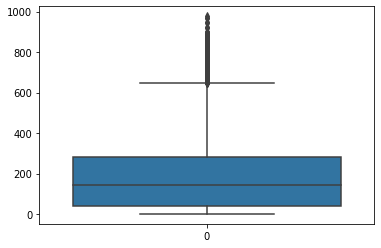

In [51]:
import seaborn as sns

sns.boxplot(data=bike_train['count'])

### DBSCAN
### - 이웃한 개체와의 밀도를 계산하여 군집하는 기법

In [67]:
from sklearn.cluster import DBSCAN

outlier_detection = DBSCAN(min_samples = 2, eps = 3)
clusters = outlier_detection.fit_predict(bike_train['count'].values.reshape(-1,1))
list(clusters).count(-1)

6

In [73]:
df = pd.DataFrame(outlier_detection.labels_)
df

,0
0,0
1,0
2,0
3,0
4,0
...,...
10881,0
10882,0
10883,0
10884,0


In [74]:
df[0].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7, -1], dtype=int64)

### IsolationForest
### - 데이터 셋을 의사 결정나무 형태로 표현하여 의사결정나무를 타고 내려가면서 정상값을 분리하고, 이상값은 상단부에서 분리할 수 있는 점을 이용한다.

In [43]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 1, contamination = 'auto')
#max_samples : 훈련을 위해 추출할 표본의 수
preds = clf.fit_predict(bike_train.iloc[:,5].values.reshape(-1,1))
print("temp :",preds)

temp : [-1 -1 -1 ...  1  1  1]


In [46]:
clf_df = pd.DataFrame(preds, columns = ['CLF'])

In [47]:
clf_df[clf_df['CLF'] == -1]

,CLF
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
10867,-1
10868,-1
10869,-1
10870,-1


### LOF
### - 관심대상 점과 그 점의 'neighbor들과의 평균거리'를 주변 neighbor들의 평균거리와 비교하는 것이다.
### - k는 20으로 하는것이 가장 좋다.

In [27]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
bike_lof = lof.fit_predict(bike_train.iloc[:,5:11])
bike_lof

array([1, 1, 1, ..., 1, 1, 1])

In [40]:
lof_df = pd.DataFrame(bike_lof, columns = ['LOF'])

In [42]:
lof_df[lof_df['LOF'] == -1]

,LOF
9,-1
11,-1
12,-1
13,-1
15,-1
...,...
10675,-1
10801,-1
10806,-1
10846,-1
